In [1]:
# Import libraries and packages
import pandas as pd
import os
import sys
from joblib import dump

# Define path with .py codes containing functions used in this script
os.chdir( '../src/models')
sys.path.append('../features/')

# Import useful functions for this script  
from tracking import track
from fun_classifiers import split_data,train_decision_tree,train_random_forest,generate_confusion_heatmap

track("-"*25 + "CLASSIFIER" + "-"*25)

# Reading data

#### Define path to data files

In [2]:
track("Defining path to data files")

# Define base path to data files
path = '../../temp_data/'

# Define path to the table that will be used in this project
path_clustered_data = path + 'model_data_with_clusters.csv'

# Ensure the input file exist
assert os.path.isfile(path_clustered_data), f'{path_clustered_data} not found. Is it a file?'

#### Read the files

In [3]:
# Read model_data table
track("Reading files")
clustered_data = pd.read_csv(path_clustered_data)
track("Finished reading files")

In [4]:
# Droping undesired columns
data = clustered_data.drop(["author", "quality_rating"],axis = 1)

A DTC with a maximum depth of 3 will be trained, performing 10 random data splits and averaging its results.

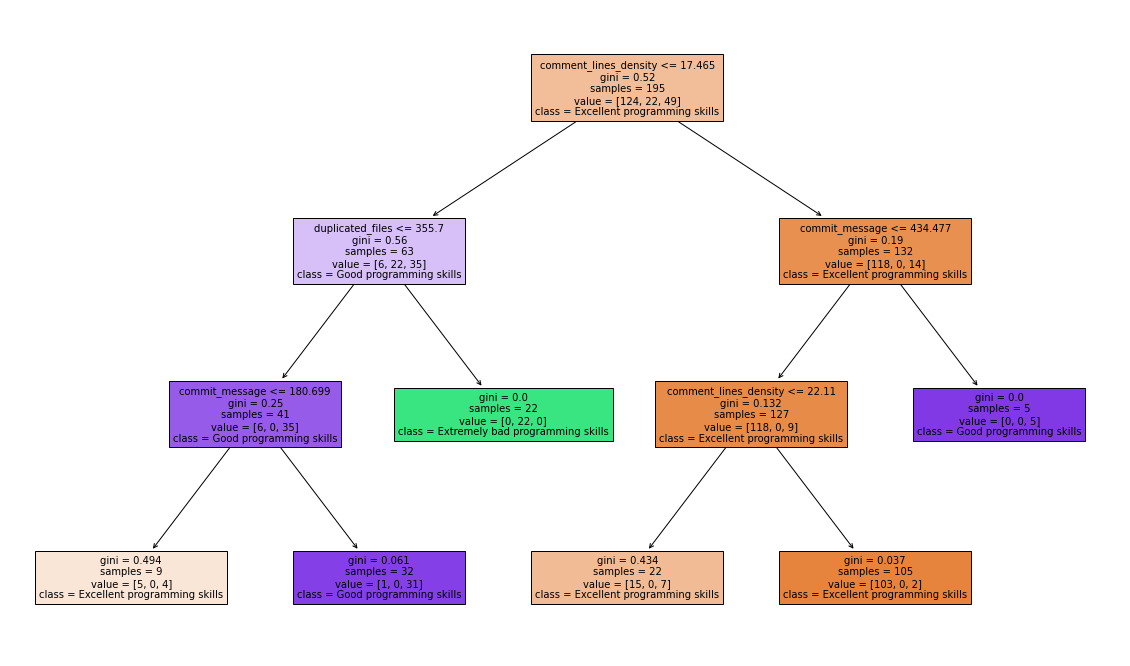

In [5]:
# Creating the decision tree classifier.
track("Training DTC")
dtc,cm_dtc, labels = train_decision_tree(data,0.2)
track("Finished training DTC")

The same operation is executed but, in this case, an ensembling of 100 DTC is used for prediciton.

In [6]:
track("Training RF")
rf,cm_rf,labels = train_random_forest(data,0.2)
track("Finished training RF")

Then their respective confusion heatmap is generated.

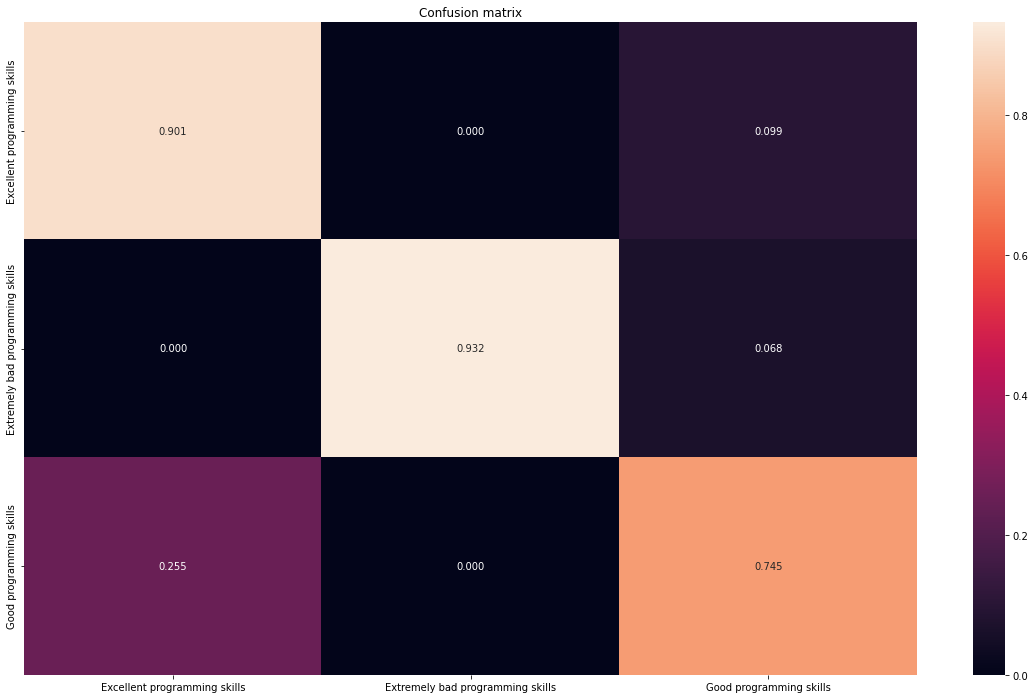

In [7]:
generate_confusion_heatmap(cm_dtc,labels,"DTC")

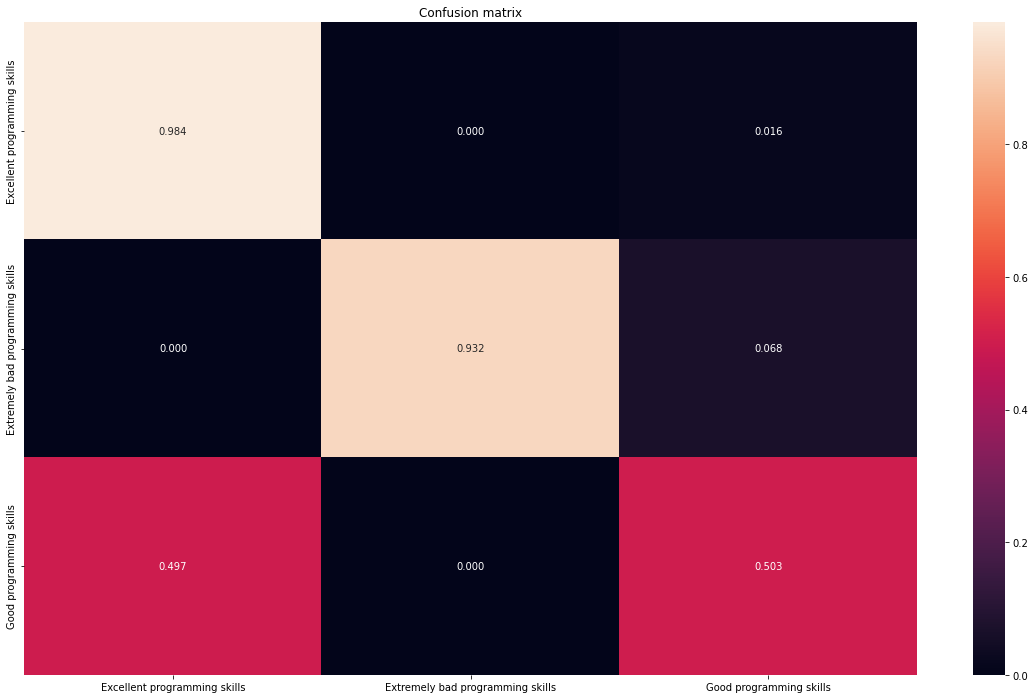

In [8]:
generate_confusion_heatmap(cm_rf,labels,"RF")

Lastly, both models are trained over all the data and stored.

In [10]:
track("Re-training and saving the models")
dtc,_,_ = train_decision_tree(data,0)
rf,_,_ = train_random_forest(data,0)
dump(dtc, '../../models/Decision_tree_classifier.joblib') 
dump(rf, '../../models/Random_forest.joblib') 

['../../models/Random_forest.joblib']